In [585]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, \
                                        cross_val_predict, cross_val_score
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

## Load data

### Describe data

In [586]:
def describe(data):
    transpose = data.transpose()
    for column in transpose:
        print(stats.describe(column))

### Plot data

In [587]:
def plot_dataset(dataset, attr='Class'):
    columns = dataset.drop(columns=[attr]).columns
    fig = sns.FacetGrid(dataset, hue=attr,  height=5, palette="bright") \
        .map(plt.scatter, columns[0], columns[1]).add_legend()

### Data Pre-Processing

In [588]:
def normalize(data):
    min_max_scaler = preprocessing.MinMaxScaler()
    return min_max_scaler.fit_transform(data)

def standardize(data):
    return preprocessing.scale(data)

### Iris

In [589]:
ds_name = 'Iris'
out_path = './out_iris/'
iris = pd.read_csv("data/iris.data", sep=",")
iris_X = iris.drop(columns=['Class']).to_numpy()
iris_y = iris['Class'].to_numpy()
#plot_dataset(iris, 'Class')

#print("=== Before pre-process ===")
#describe(iris_X)

data_X = normalize(iris_X)
#data_X = iris_X
data_y = iris_y

#print("\n=== After pre-process ===")
#describe(data_X)

### Glass

In [590]:
ds_name = 'Glass'
out_path = './out_glass/'
glass = pd.read_csv("data/glass.data", sep=",").drop(columns=['Id'])
glass_X = glass.drop(columns=['Class']).to_numpy()
glass_y = glass['Class'].to_numpy()
#plot_dataset(glass, attr='Class')

#print("=== Before pre-process ===")
#describe(glass_X)

data_X = normalize(glass_X)
#data_X = glass_X
data_y = glass_y

#print("\n=== After pre-process ===")
#describe(data_X)

### Wine

In [591]:
ds_name = 'Wine'
out_path = './out_wine/'
wine = pd.read_csv("data/wine.data", sep=",")
wine_X = wine.drop(columns=['Class']).to_numpy()
wine_y = wine['Class'].to_numpy()
#plot_dataset(wine, attr='Class')

#print("=== Before pre-process ===")
#describe(wine_X)

data_X = normalize(wine_X)
#data_X = wine_X
data_y = wine_y

#print("\n=== After pre-process ===")
#describe(data_X)

### Seeds

In [592]:
ds_name = 'Seeds'
out_path = './out_seeds/'
seeds = pd.read_csv("data/seeds_dataset.txt", sep="\t")
seeds_X = seeds.drop(columns=['Class']).to_numpy()
seeds_y = seeds['Class'].to_numpy()
#plot_dataset(seeds, attr='Class')

#print("=== Before pre-process ===")
#describe(seeds_X)

data_X = normalize(seeds_X)
#data_X = seeds_X
data_y = seeds_y

#print("\n=== After pre-process ===")
#describe(data_X)

## Metrics

In [593]:
round_precision = 3

def get_accuracy(y_real, y_pred):
    return round(accuracy_score(y_real, y_pred), round_precision)

def get_precision(y_real, y_pred):
    return round(precision_score(y_real, y_pred, average='macro'), round_precision)

def get_recall(y_real, y_pred):
    return round(recall_score(y_real, y_pred, average='macro'), round_precision)

def get_FSC(y_real, y_pred):
    return round(f1_score(y_real, y_pred, average='macro'), round_precision)

def getAllMetrics(y_real, y_pred):
    print("Accuracy:", get_accuracy(y_real, y_pred))
    print("Precision:", get_precision(y_real, y_pred))
    print("Recall:", get_recall(y_real, y_pred))
    print("F1 score:", get_FSC(y_real, y_pred))

## KNN

In [594]:
def knn_for_neighbours(X, y, folds, nb_list):
    y_preds = {}
    for neighbours in nb_list:
        classifier = KNeighborsClassifier(n_neighbors=neighbours)
        y_pred = cross_val_predict(classifier, X, y, cv=folds)
        y_preds[neighbours] = y_pred
    return y_preds

In [595]:
def knn_for_params(X, y, classifier, folds):
    y_pred = cross_val_predict(classifier, X, y, cv=folds)
    return y_pred

## Plots

In [596]:
def bar_plot(name, plot_data, to_file='', show=True, save=False):
    bars = plot_data.keys()
    height = plot_data.values()
    
    y_pos = np.arange(len(bars))
    plt.ylim(0,1)
    plt.title(name)
    plt.bar(y_pos, height, color=['red', 'green', 'blue']) # alpha=0.2
    plt.xticks(y_pos, bars)
    #bars.set_rasterized(True)
    
    if show:
        plt.show()
    elif save:
        plt.savefig('{}{}_{}.png'.format(out_path, name, to_file), dpi=120)

## Experiments

### FSC for different number of neighbours

In [597]:
fold_nums = [2, 5, 10]
nb_list = [1,2,3,4,5,6,8,10,15,20,25,30,35,40]
show_plots = False
tex = False # if False - readable info

=== K-Fold ===
K = 2
	Nnum of neighbours = 1 FSC = 0.259
	Nnum of neighbours = 2 FSC = 0.248
	Nnum of neighbours = 3 FSC = 0.261
	Nnum of neighbours = 4 FSC = 0.255
	Nnum of neighbours = 5 FSC = 0.27
	Nnum of neighbours = 6 FSC = 0.268
	Nnum of neighbours = 8 FSC = 0.27
	Nnum of neighbours = 10 FSC = 0.27
	Nnum of neighbours = 15 FSC = 0.275
	Nnum of neighbours = 20 FSC = 0.276
	Nnum of neighbours = 25 FSC = 0.279
	Nnum of neighbours = 30 FSC = 0.275
	Nnum of neighbours = 35 FSC = 0.28
	Nnum of neighbours = 40 FSC = 0.284
K = 5
	Nnum of neighbours = 1 FSC = 0.852
	Nnum of neighbours = 2 FSC = 0.826
	Nnum of neighbours = 3 FSC = 0.865
	Nnum of neighbours = 4 FSC = 0.853
	Nnum of neighbours = 5 FSC = 0.87
	Nnum of neighbours = 6 FSC = 0.866
	Nnum of neighbours = 8 FSC = 0.857
	Nnum of neighbours = 10 FSC = 0.847
	Nnum of neighbours = 15 FSC = 0.861
	Nnum of neighbours = 20 FSC = 0.857
	Nnum of neighbours = 25 FSC = 0.833
	Nnum of neighbours = 30 FSC = 0.825
	Nnum of neighbours = 35 FSC =

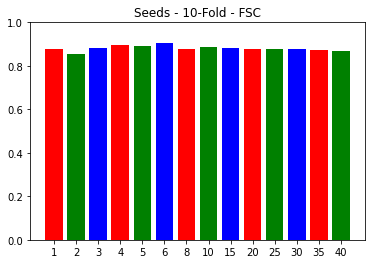

In [598]:
print("=== K-Fold ===")
cross_validator = KFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    y_preds = knn_for_neighbours(data_X, data_y, folds, nb_list)
    print('K =', fold_num)
    for nbs in nb_list:
        accs[nbs] = get_accuracy(data_y, y_preds[nbs])
        precs[nbs] = get_precision(data_y, y_preds[nbs])
        recs[nbs] = get_recall(data_y, y_preds[nbs])
        fscrs[nbs] = get_FSC(data_y, y_preds[nbs])
        
        if tex:
            # to .tex table
            print('  ', nbs, '&', accs[nbs], '&', precs[nbs], \
                  '&', recs[nbs], '&', fscrs[nbs], '\\\\')
        else:
            print('\tNnum of neighbours =', nbs, 'FSC =', fscrs[nbs])
        
    bar_plot('{} - {}-Fold - Accuracy'.format(ds_name, fold_num), accs, to_file='neighs', show=show_plots)
    bar_plot('{} - {}-Fold - Precision'.format(ds_name, fold_num), precs, to_file='neighs', show=show_plots)
    bar_plot('{} - {}-Fold - Recall'.format(ds_name, fold_num), recs, to_file='neighs', show=show_plots)
    bar_plot('{} - {}-Fold - FSC'.format(ds_name, fold_num), fscrs, to_file='neighs', show=show_plots, save=True)

=== Stratified K-Fold ===
K = 2
	Nnum of neighbours = 1 FSC = 0.919
	Nnum of neighbours = 2 FSC = 0.911
	Nnum of neighbours = 3 FSC = 0.919
	Nnum of neighbours = 4 FSC = 0.929
	Nnum of neighbours = 5 FSC = 0.928
	Nnum of neighbours = 6 FSC = 0.919
	Nnum of neighbours = 8 FSC = 0.919
	Nnum of neighbours = 10 FSC = 0.915
	Nnum of neighbours = 15 FSC = 0.914
	Nnum of neighbours = 20 FSC = 0.91
	Nnum of neighbours = 25 FSC = 0.905
	Nnum of neighbours = 30 FSC = 0.901
	Nnum of neighbours = 35 FSC = 0.9
	Nnum of neighbours = 40 FSC = 0.901
K = 5
	Nnum of neighbours = 1 FSC = 0.919
	Nnum of neighbours = 2 FSC = 0.916
	Nnum of neighbours = 3 FSC = 0.913
	Nnum of neighbours = 4 FSC = 0.919
	Nnum of neighbours = 5 FSC = 0.923
	Nnum of neighbours = 6 FSC = 0.929
	Nnum of neighbours = 8 FSC = 0.919
	Nnum of neighbours = 10 FSC = 0.909
	Nnum of neighbours = 15 FSC = 0.919
	Nnum of neighbours = 20 FSC = 0.909
	Nnum of neighbours = 25 FSC = 0.914
	Nnum of neighbours = 30 FSC = 0.905
	Nnum of neighbou

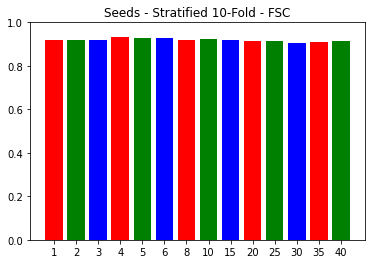

In [599]:
print("=== Stratified K-Fold ===")
cross_validator = StratifiedKFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    y_preds = knn_for_neighbours(data_X, data_y, folds, nb_list)
    print('K =', fold_num)
    for nbs in nb_list:
        accs[nbs] = get_accuracy(data_y, y_preds[nbs])
        precs[nbs] = get_precision(data_y, y_preds[nbs])
        recs[nbs] = get_recall(data_y, y_preds[nbs])
        fscrs[nbs] = get_FSC(data_y, y_preds[nbs])
        
        if tex:
            # to .tex table
            print('  ', nbs, '&', accs[nbs], '&', precs[nbs], \
                  '&', recs[nbs], '&', fscrs[nbs], '\\\\')
        else:
            print('\tNnum of neighbours =', nbs, 'FSC =', fscrs[nbs])

    bar_plot('{} - Stratified {}-Fold - Accuracy'.format(ds_name, fold_num), accs, to_file='neighs', show=show_plots)
    bar_plot('{} - Stratified {}-Fold - Precision'.format(ds_name, fold_num), precs, to_file='neighs', show=show_plots)
    bar_plot('{} - Stratified {}-Fold - Recall'.format(ds_name, fold_num), recs, to_file='neighs', show=show_plots)
    bar_plot('{} - Stratified {}-Fold - FSC'.format(ds_name, fold_num), fscrs, to_file='neighs', show=show_plots, save=True)

### FSC for different types of distance calculations

In [600]:
fold_nums = [2, 5, 10]
dist_metrics = ['manhattan', 'euclidean', 'chebyshev']
show_plots = False
tex = False # if False - readable info

=== K-Fold ===
K = 2
	Distance metric = manhattan FSC = 0.266
	Distance metric = euclidean FSC = 0.27
	Distance metric = chebyshev FSC = 0.289
K = 5
	Distance metric = manhattan FSC = 0.838
	Distance metric = euclidean FSC = 0.87
	Distance metric = chebyshev FSC = 0.861
K = 10
	Distance metric = manhattan FSC = 0.876
	Distance metric = euclidean FSC = 0.89
	Distance metric = chebyshev FSC = 0.886


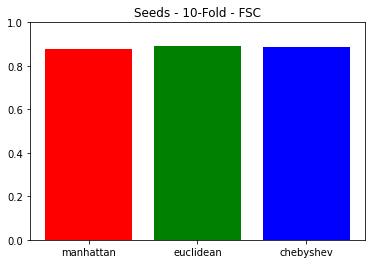

In [601]:
print("=== K-Fold ===")
cross_validator = KFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    print('K =', fold_num)
    for dist_metric in dist_metrics:
        classifier = KNeighborsClassifier(metric=dist_metric)
        y_pred = knn_for_params(data_X, data_y, classifier, folds)
        
        accs[dist_metric] = get_accuracy(data_y, y_pred)
        precs[dist_metric] = get_precision(data_y, y_pred)
        recs[dist_metric] = get_recall(data_y, y_pred)
        fscrs[dist_metric] = get_FSC(data_y, y_pred)
        
        if tex:
            # to .tex table
            print('  ', dist_metric, '&', accs[dist_metric], '&', precs[dist_metric], \
                  '&', recs[dist_metric], '&', fscrs[dist_metric], '\\\\')
        else:
            print('\tDistance metric =', dist_metric, 'FSC =', fscrs[dist_metric])

    bar_plot('{} - {}-Fold - Accuracy'.format(ds_name, fold_num), accs, to_file='distance', show=show_plots)
    bar_plot('{} - {}-Fold - Precision'.format(ds_name, fold_num), precs, to_file='distance', show=show_plots)
    bar_plot('{} - {}-Fold - Recall'.format(ds_name, fold_num), recs, to_file='distance', show=show_plots)
    bar_plot('{} - {}-Fold - FSC'.format(ds_name, fold_num), fscrs, to_file='distance', show=show_plots, save=True)

=== Stratified K-Fold ===
K = 2
	Distance metric = manhattan FSC = 0.914
	Distance metric = euclidean FSC = 0.928
	Distance metric = chebyshev FSC = 0.919
K = 5
	Distance metric = manhattan FSC = 0.9
	Distance metric = euclidean FSC = 0.923
	Distance metric = chebyshev FSC = 0.914
K = 10
	Distance metric = manhattan FSC = 0.904
	Distance metric = euclidean FSC = 0.914
	Distance metric = chebyshev FSC = 0.929


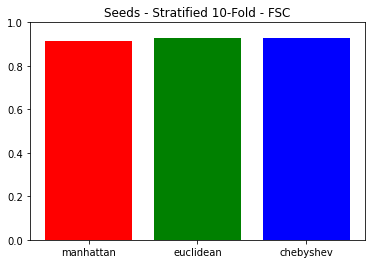

In [602]:
print("=== Stratified K-Fold ===")
cross_validator = StratifiedKFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    print('K =', fold_num)
    for dist_metric in dist_metrics:
        classifier = KNeighborsClassifier(metric=dist_metric)
        y_pred = knn_for_params(data_X, data_y, classifier, folds)
        
        accs[dist_metric] = get_accuracy(data_y, y_pred)
        precs[dist_metric] = get_precision(data_y, y_pred)
        recs[dist_metric] = get_recall(data_y, y_pred)
        fscrs[dist_metric] = get_FSC(data_y, y_pred)
        
        if tex:
            # to .tex table
            print('  ', dist_metric, '&', accs[dist_metric], '&', precs[dist_metric], \
                  '&', recs[dist_metric], '&', fscrs[dist_metric], '\\\\')
        else:
            print('\tDistance metric =', dist_metric, 'FSC =', fscrs[dist_metric])
        
    bar_plot('{} - Stratified {}-Fold - Accuracy'.format(ds_name, fold_num), accs, to_file='distance', show=show_plots)
    bar_plot('{} - Stratified {}-Fold - Precision'.format(ds_name, fold_num), precs, to_file='distance', show=show_plots)
    bar_plot('{} - Stratified {}-Fold - Recall'.format(ds_name, fold_num), recs, to_file='distance', show=show_plots)
    bar_plot('{} - Stratified {}-Fold - FSC'.format(ds_name, fold_num), fscrs, to_file='distance', show=show_plots, save=True)

### FSC for different vote schemes

In [603]:
fold_nums = [2, 5, 10]
vote_schemes = ['distance', 'uniform', 'random']
show_plots = False
tex = False # if False - readable info

def random_vs(distance):
    return np.random.normal(size=distance.shape)

=== K-Fold ===
K = 2
	Vote scheme = distance FSC = 0.27
	Vote scheme = uniform FSC = 0.27
	Vote scheme = random FSC = 0.198
K = 5
	Vote scheme = distance FSC = 0.865
	Vote scheme = uniform FSC = 0.87
	Vote scheme = random FSC = 0.582
K = 10
	Vote scheme = distance FSC = 0.885
	Vote scheme = uniform FSC = 0.89
	Vote scheme = random FSC = 0.586


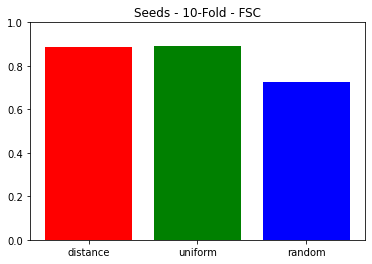

In [604]:
print("=== K-Fold ===")
cross_validator = KFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    print('K =', fold_num)
    for vote_scheme in vote_schemes:
        if vote_scheme == 'random':
            classifier = KNeighborsClassifier(weights=random_vs)
        else:
            classifier = KNeighborsClassifier(weights=vote_scheme)
        y_pred = knn_for_params(data_X, data_y, classifier, folds)
        
        accs[vote_scheme] = get_accuracy(data_y, y_pred)
        precs[vote_scheme] = get_precision(data_y, y_pred)
        recs[vote_scheme] = get_recall(data_y, y_pred)
        fscrs[vote_scheme] = get_FSC(data_y, y_pred)
        
        if tex:
            # to .tex table
            print('  ', vote_scheme, '&', accs[vote_scheme], '&', precs[vote_scheme], \
                  '&', recs[vote_scheme], '&', fscrs[vote_scheme], '\\\\')
        else:
            print('\tVote scheme =', vote_scheme, 'FSC =', fscrs[vote_scheme])
        
    bar_plot('{} - {}-Fold - Accuracy'.format(ds_name, fold_num), accs, to_file='vote', show=show_plots)
    bar_plot('{} - {}-Fold - Precision'.format(ds_name, fold_num), precs, to_file='vote', show=show_plots)
    bar_plot('{} - {}-Fold - Recall'.format(ds_name, fold_num), recs, to_file='vote', show=show_plots)
    bar_plot('{} - {}-Fold - FSC'.format(ds_name, fold_num), fscrs, to_file='vote', show=show_plots, save=True)

=== Stratified K-Fold ===
K = 2
	Vote scheme = distance FSC = 0.928
	Vote scheme = uniform FSC = 0.928
	Vote scheme = random FSC = 0.642
K = 5
	Vote scheme = distance FSC = 0.918
	Vote scheme = uniform FSC = 0.923
	Vote scheme = random FSC = 0.65
K = 10
	Vote scheme = distance FSC = 0.909
	Vote scheme = uniform FSC = 0.914
	Vote scheme = random FSC = 0.618


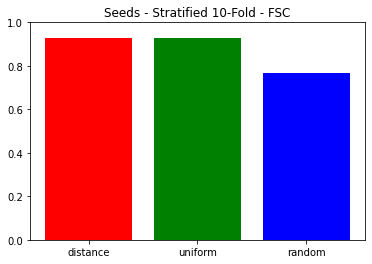

In [605]:
print("=== Stratified K-Fold ===")
cross_validator = StratifiedKFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    print('K =', fold_num)
    for vote_scheme in vote_schemes:
        if vote_scheme == 'random':
            classifier = KNeighborsClassifier(weights=random_vs)
        else:
            classifier = KNeighborsClassifier(weights=vote_scheme)
        y_pred = knn_for_params(data_X, data_y, classifier, folds)
        
        accs[vote_scheme] = get_accuracy(data_y, y_pred)
        precs[vote_scheme] = get_precision(data_y, y_pred)
        recs[vote_scheme] = get_recall(data_y, y_pred)
        fscrs[vote_scheme] = get_FSC(data_y, y_pred)
        
        if tex:
            # to .tex table
            print('  ', vote_scheme, '&', accs[vote_scheme], '&', precs[vote_scheme], \
                  '&', recs[vote_scheme], '&', fscrs[vote_scheme], '\\\\')
        else:
            print('\tVote scheme =', vote_scheme, 'FSC =', fscrs[vote_scheme])
        
    bar_plot('{} - Stratified {}-Fold - Accuracy'.format(ds_name, fold_num), accs, to_file='vote', show=show_plots)
    bar_plot('{} - Stratified {}-Fold - Precision'.format(ds_name, fold_num), precs, to_file='vote', show=show_plots)
    bar_plot('{} - Stratified {}-Fold - Recall'.format(ds_name, fold_num), recs, to_file='vote', show=show_plots)
    bar_plot('{} - Stratified {}-Fold - FSC'.format(ds_name, fold_num), fscrs, to_file='vote', show=show_plots, save=True)

In [606]:
ds_name

'Seeds'